# Linear Regression + Random Forest (Single Notebook)

This notebook trains two regression models on the same dataset:
- Linear Regression
- Random Forest Regression

**What happens here**
- Load the master ML-ready dataset.
- Split into train/test.
- Train both models.
- Compare RMSE and $R^2$.
- Visualize predictions and feature importance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_path = r"d:\\jjjjjj\\Intership_Calls\\Data_Processing\\startup_funding_master_ml_ready.csv"
df = pd.read_csv(data_path)
df.shape

(2225, 5710)

In [3]:
# Split features and target
X = df.drop(columns=["amount_usd", "funding_high"])
y = df["amount_usd"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# Linear Regression
lin = LinearRegression(n_jobs=None)
lin.fit(X_train, y_train)
lin_pred = lin.predict(X_test)
lin_rmse = mean_squared_error(y_test, lin_pred) ** 0.5
lin_r2 = r2_score(y_test, lin_pred)
lin_rmse, lin_r2

(111616868.8762373, -0.8008391654616371)

In [5]:
# Random Forest Regression
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    max_depth=None
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred) ** 0.5
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse, rf_r2

(93876572.35362415, -0.2738834779704129)

In [6]:
# Compare metrics
metrics = pd.DataFrame(
    {
        "Model": ["Linear Regression", "Random Forest"],
        "RMSE": [lin_rmse, rf_rmse],
        "R2": [lin_r2, rf_r2],
    }
)
metrics

,Model,RMSE,R2
0,Linear Regression,1.116169e+08,-0.800839
1,Random Forest,9.387657e+07,-0.273883


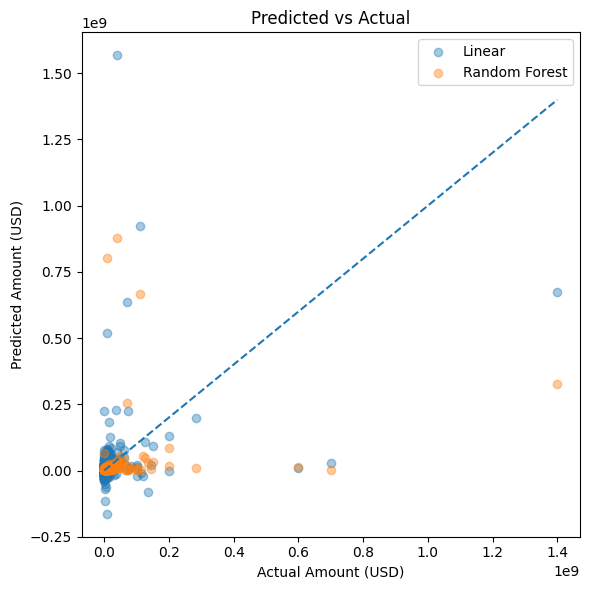

In [7]:
# Predicted vs actual plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, lin_pred, alpha=0.4, label="Linear")
plt.scatter(y_test, rf_pred, alpha=0.4, label="Random Forest")
plt.xlabel("Actual Amount (USD)")
plt.ylabel("Predicted Amount (USD)")
plt.title("Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

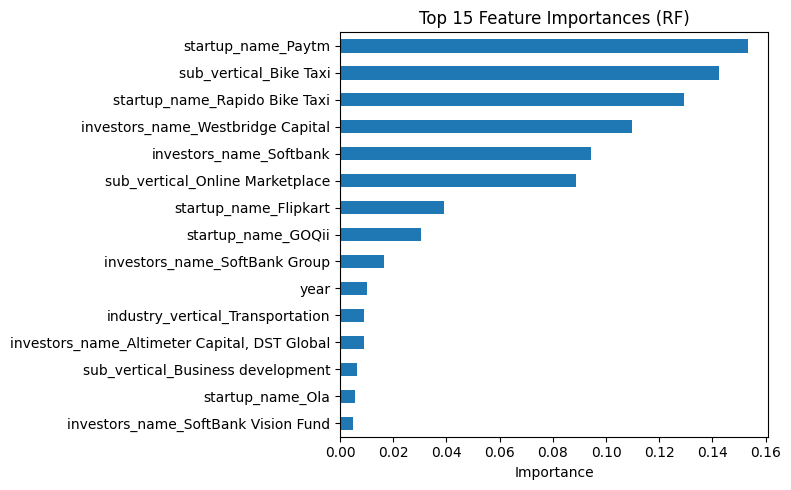

In [8]:
# Top feature importances from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_k = importances.sort_values(ascending=False).head(15)
plt.figure(figsize=(8, 5))
top_k.sort_values().plot(kind="barh")
plt.title("Top 15 Feature Importances (RF)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()